# AirLines

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
from pandas.plotting import lag_plot
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [100]:
airlines = pd.read_excel(r'C:\Users\Administrator\Downloads\Airlines+Data.xlsx')
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [101]:
airlines.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [38]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [40]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [102]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


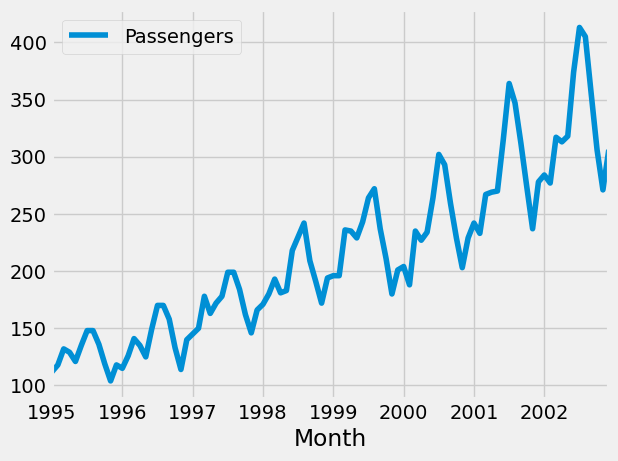

In [104]:
airlines1 =pd. read_excel(r"C:\Users\Administrator\Downloads\Airlines+Data.xlsx", header=0, index_col=0,parse_dates=True)
airlines1.plot()
pyplot.show()

In [105]:
airlines1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


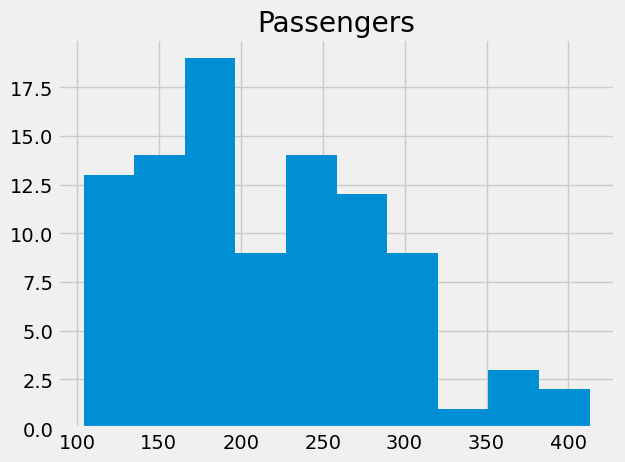

In [106]:
airlines1.hist()
pyplot.show()

<Axes: ylabel='Density'>

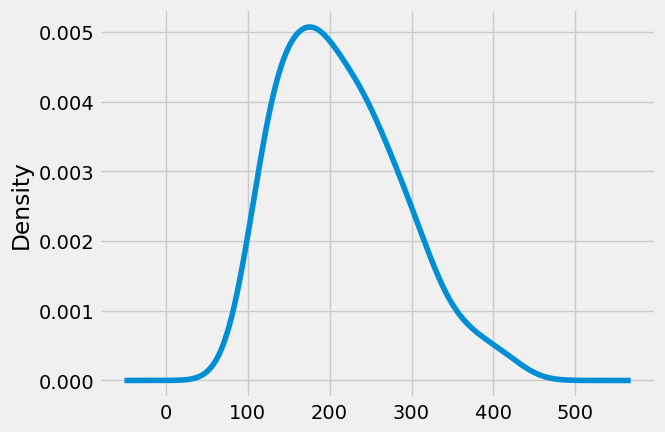

In [107]:
airlines1.Passengers.plot(kind='kde')

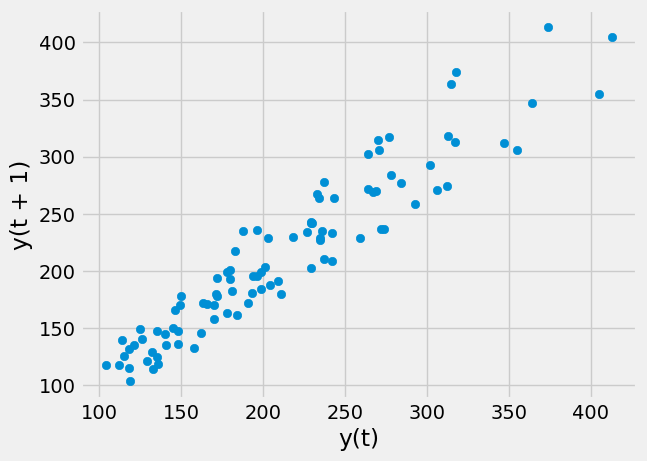

In [108]:
from pandas.plotting import lag_plot

lag_plot(airlines1)
pyplot.show()

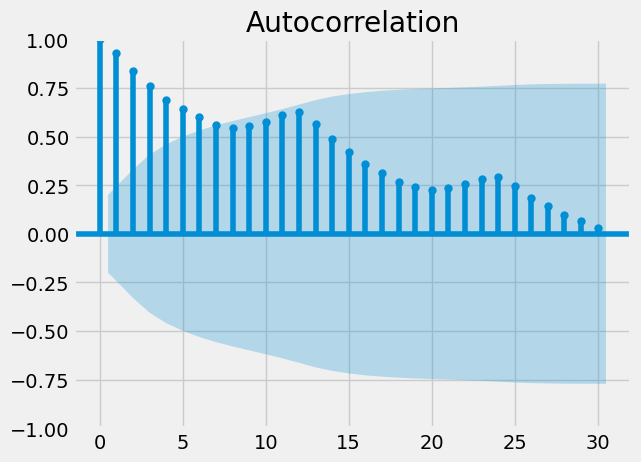

In [109]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(airlines1,lags=30)
pyplot.show()

In [110]:
upsampled = airlines1.resample('D').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


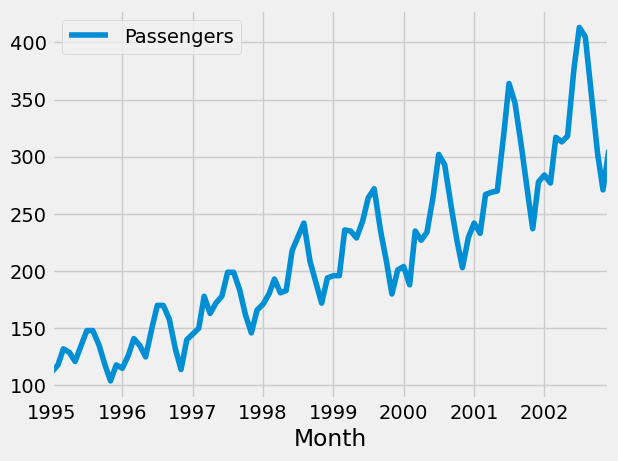

In [111]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

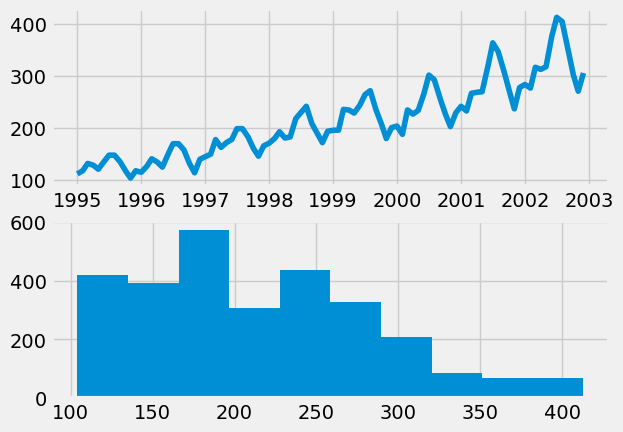

In [112]:
pyplot.subplot(211)
pyplot.plot(interpolated)

pyplot.subplot(212)
pyplot.hist(interpolated)
pyplot.show()

In [113]:
interpolated

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


In [114]:
dataframe = DataFrame(interpolated)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

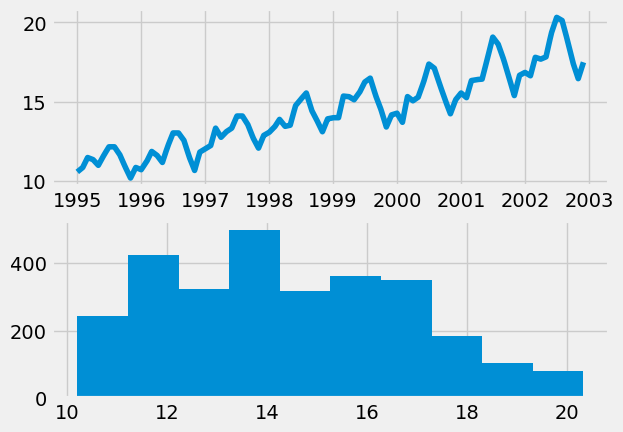

In [115]:
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])

pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

In [116]:
interpolated

,Passengers
Month,
1995-01-01,10.583005
1995-01-02,10.592146
1995-01-03,10.601278
1995-01-04,10.610403
1995-01-05,10.619519
...,...
2002-11-27,17.358955
2002-11-28,17.392527
2002-11-29,17.426034


In [117]:
dataframe = DataFrame(interpolated)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

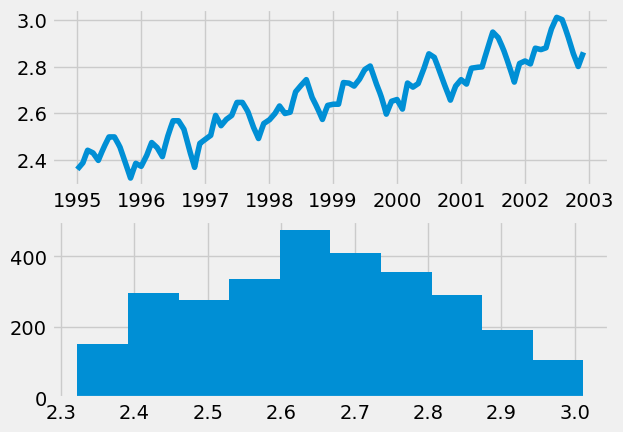

In [118]:
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])

pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

In [119]:
interpolated

,Passengers
Month,
1995-01-01,2.359249
1995-01-02,2.360113
1995-01-03,2.360975
1995-01-04,2.361835
1995-01-05,2.362694
...,...
2002-11-27,2.854109
2002-11-28,2.856041
2002-11-29,2.857965


In [120]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2892 entries, 1995-01-01 to 2002-12-01
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  2892 non-null   float64
dtypes: float64(1)
memory usage: 45.2 KB


In [121]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [122]:
airlines["Date"]=pd.to_datetime(airlines.Month,format="%b-%y")
airlines["Months"]=airlines.Date.dt.strftime("%b")
airlines["Year"]=airlines.Date.dt.strftime("%Y")

<Axes: xlabel='Month', ylabel='Year'>

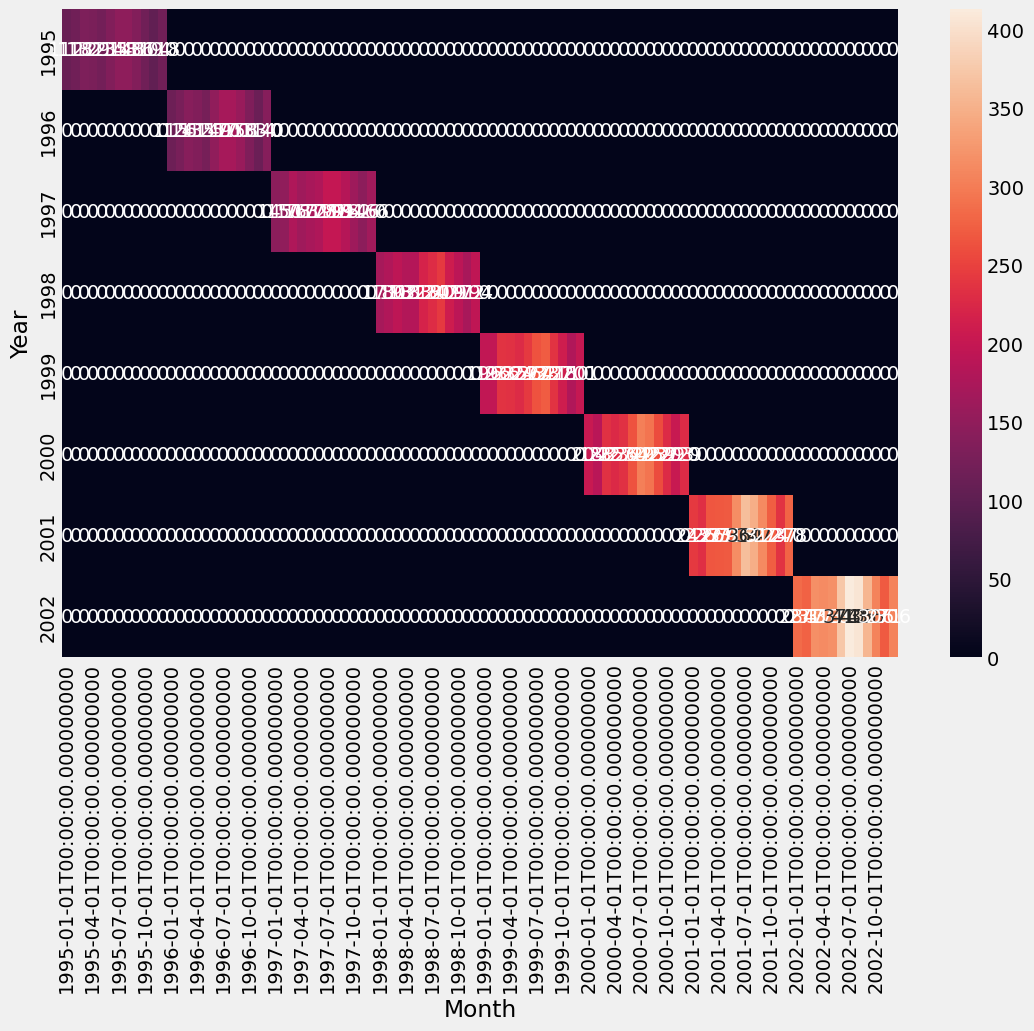

In [123]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") 

<Axes: xlabel='Months', ylabel='Passengers'>

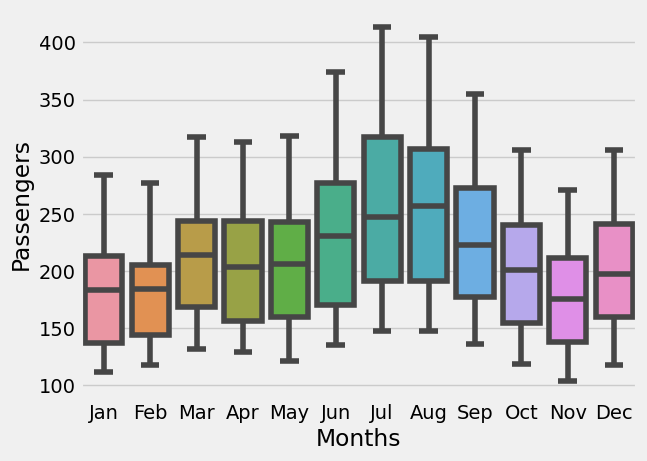

In [124]:
sns.boxplot(x="Months",y="Passengers",data=airlines)

In [125]:
Month_Dummies = pd.DataFrame(pd.get_dummies(airlines['Months']))
airline1 = pd.concat([airlines,Month_Dummies],axis = 1)

In [126]:
airline1["t"] = np.arange(1,97)
airline1["t_squared"] = airline1["t"]*airline1["t"]
airline1["Log_Passengers"] = np.log(airline1["Passengers"])

In [127]:
airline1

,Month,Passengers,Date,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<Axes: xlabel='Year', ylabel='Passengers'>

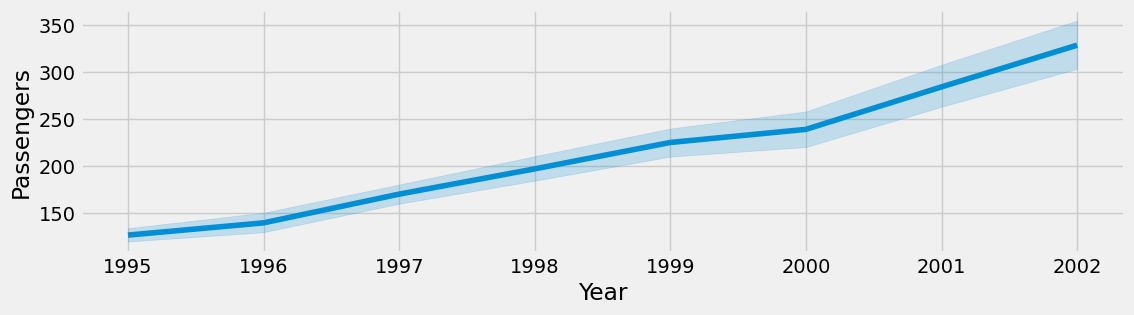

In [128]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=airlines)

In [129]:
Train = airline1.head(80)
Test = airline1.tail(16)

In [132]:
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.54262406772677

In [134]:
Exp = smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334312

In [135]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584205

In [136]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443307

In [137]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(Test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570104943

In [138]:
Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621076

In [139]:
Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

9.469000230305781

In [140]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,47.542624
1,rmse_Exp,43.793739
2,rmse_Quad,43.654404
3,rmse_add_sea,129.266476
4,rmse_add_sea_quad,23.910984
5,rmse_Mult_sea,135.326484
6,rmse_Mult_add_sea,9.469000


In [141]:
t = np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [142]:
t_squared=np.array(t*t)
t_squared

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [143]:
Month = pd.DataFrame({'Month':['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01',
                               '2003-08-01','2003-09-01','2003-10-01','2003-10-01']})

In [144]:
df={'t':t,'t_squared':t_squared}
df=pd.DataFrame(df)

In [145]:
newdata = pd.concat([Month,df],axis=1)
newdata

,Month,t,t_squared
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


In [146]:
model_full = smf.ols('Passengers~t',data=airline1).fit()
pred_new  = pd.Series(model_full.predict(newdata))
pred_new

0     326.941886
1     329.276598
2     331.611311
3     333.946023
4     336.280736
5     338.615448
6     340.950161
7     343.284873
8     345.619585
9     347.954298
10    350.289010
dtype: float64

In [147]:
newdata["forecasted_passengers"]=pd.Series(pred_new)
newdata

,Month,t,t_squared,forecasted_passengers
0,2003-01-01,97,9409,326.941886
1,2003-02-01,98,9604,329.276598
2,2003-03-01,99,9801,331.611311
3,2003-04-01,100,10000,333.946023
4,2003-05-01,101,10201,336.280736
5,2003-06-01,102,10404,338.615448
6,2003-07-01,103,10609,340.950161
7,2003-08-01,104,10816,343.284873
8,2003-09-01,105,11025,345.619585
9,2003-10-01,106,11236,347.954298


# Coca-cola

In [148]:
coke = pd.read_excel(r"C:\Users\Administrator\Downloads\CocaCola_Sales_Rawdata.xlsx")
coke

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [149]:
coke.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [150]:
coke.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [151]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [152]:
coke.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [153]:
coke.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [154]:
coke['Quarters']=0
coke['Year']=0
for i in range(42):
    p=coke["Quarter"][i]
    coke['Quarters'][i]=p[0:2]
    coke['Year'][i]=p[3:5]

In [155]:
coke.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [157]:
quarters_dummies = pd.DataFrame(pd.get_dummies(coke['Quarters']))
coke = pd.concat([coke,quarters_dummies],axis=1)
coke.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [158]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   42 non-null     object 
 1   Sales     42 non-null     float64
 2   Quarters  42 non-null     object 
 3   Year      42 non-null     object 
 4   Q1        42 non-null     uint8  
 5   Q2        42 non-null     uint8  
 6   Q3        42 non-null     uint8  
 7   Q4        42 non-null     uint8  
dtypes: float64(1), object(3), uint8(4)
memory usage: 1.6+ KB


<Axes: xlabel='Quarters', ylabel='Year'>

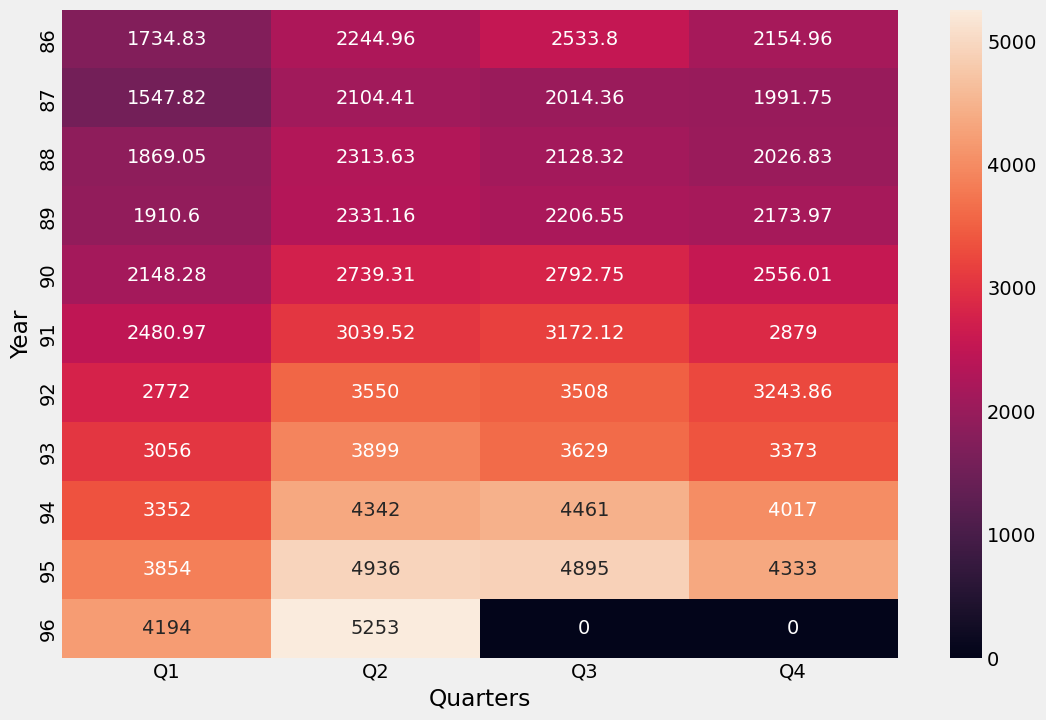

In [159]:
plt.figure(figsize=(12,8))
heatmap_y_year = pd.pivot_table(data=coke,values="Sales",index="Year",columns="Quarters",fill_value=0)
sns.heatmap(heatmap_y_year,annot=True,fmt="g")

<Axes: >

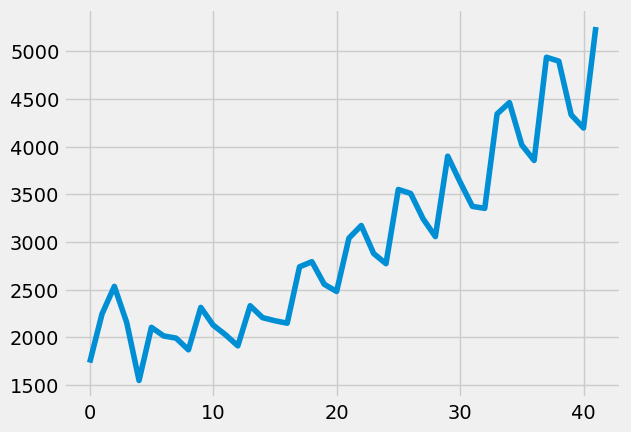

In [160]:
coke.Sales.plot()

<Axes: >

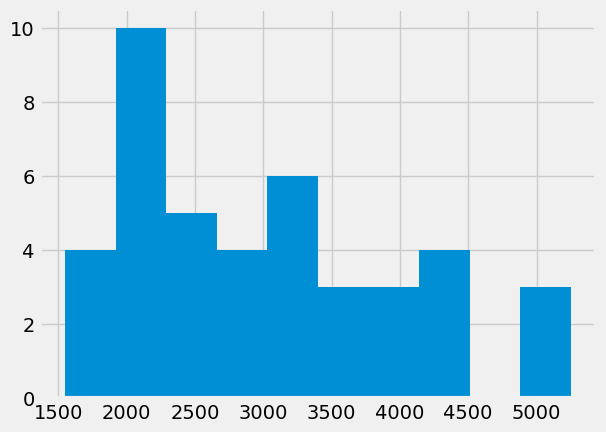

In [161]:
coke.Sales.hist()

<Axes: ylabel='Density'>

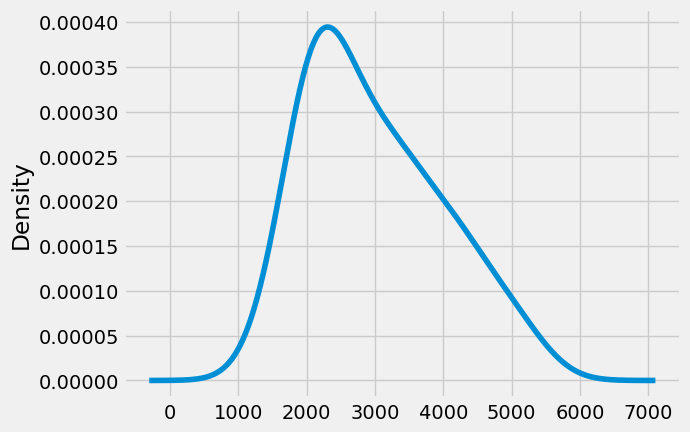

In [162]:
coke.Sales.plot(kind='kde')

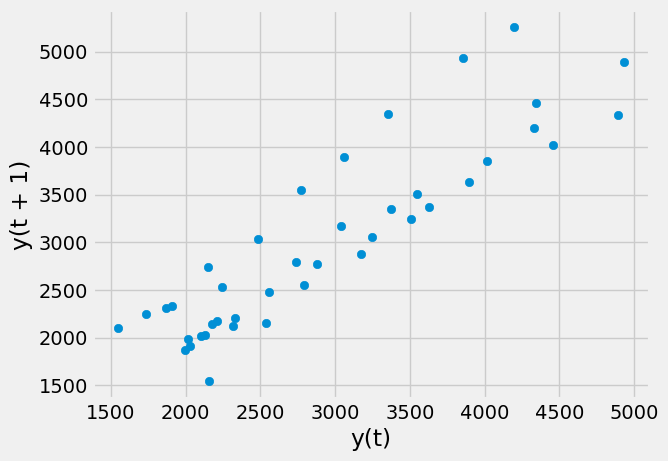

In [164]:
lag_plot(coke.Sales)
plt.show()

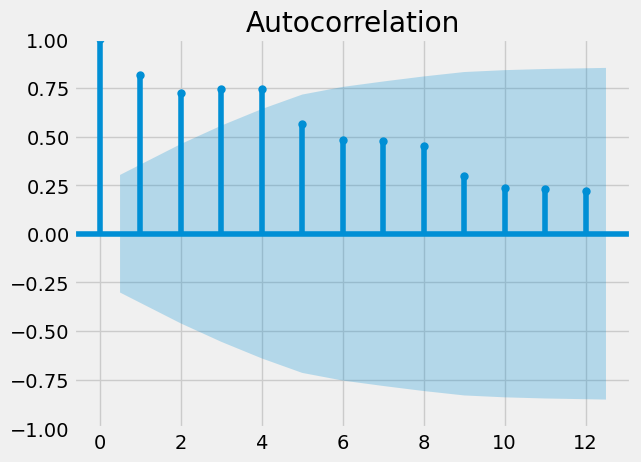

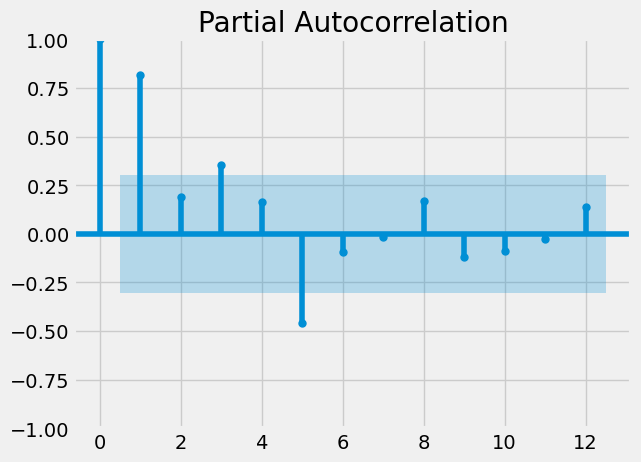

In [165]:
tsa_plots.plot_acf(coke.Sales,lags=12)
tsa_plots.plot_pacf(coke.Sales,lags=12)
plt.show()

<Axes: xlabel='Year', ylabel='Sales'>

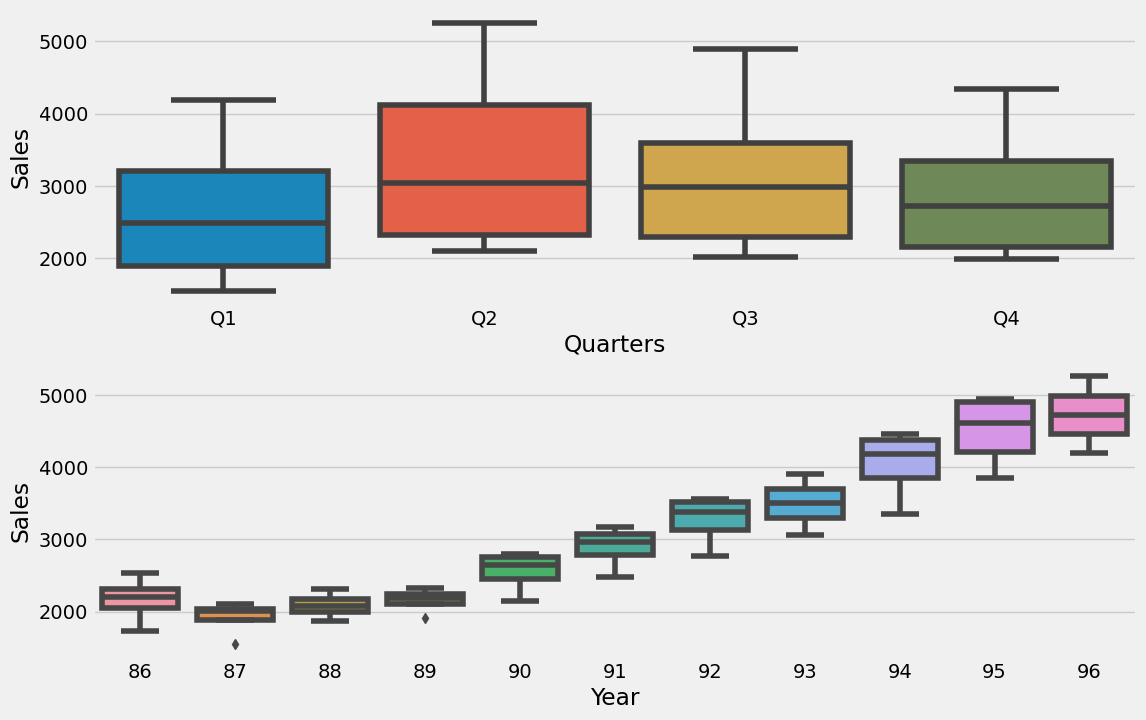

In [166]:
plt.figure(figsize=(12,8))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=coke)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=coke)

In [167]:
coke["t"] = np.arange(1,43)
coke["t_squared"] = coke["t"]*coke["t"]
coke["log_sales"] = np.log(coke["Sales"])
coke.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


<Axes: xlabel='Year', ylabel='Sales'>

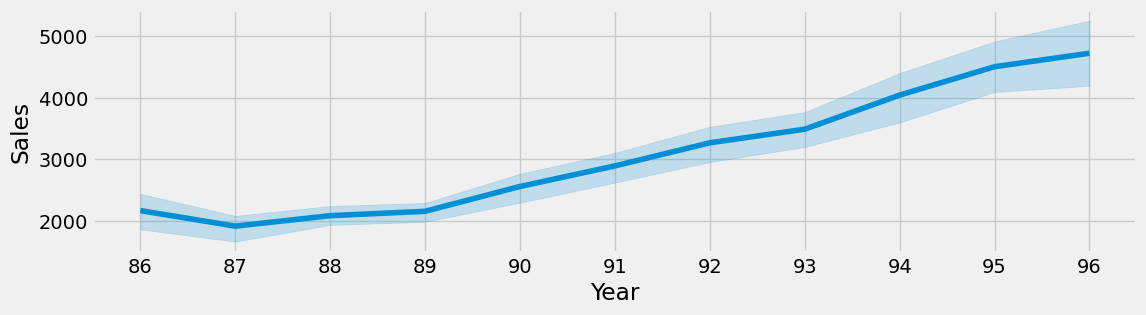

In [168]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=coke)

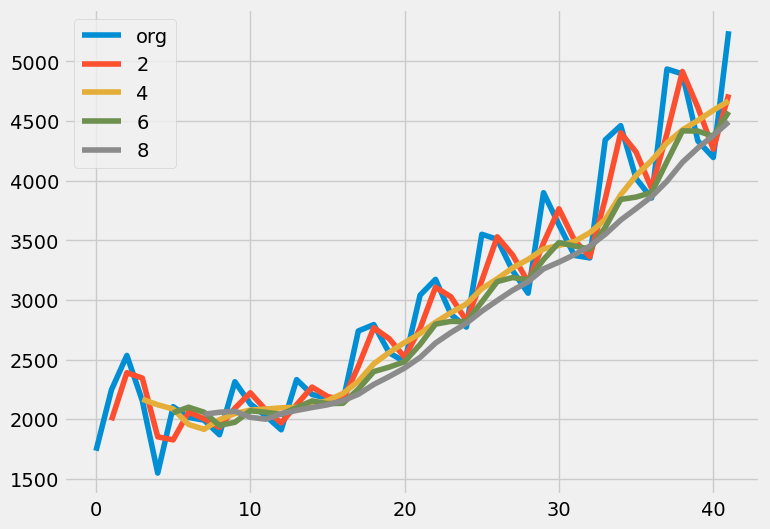

In [169]:
plt.figure(figsize=(8,6))
coke.Sales.plot(label="org")
for i in range(2,10,2):
    coke["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [170]:
train = coke.head(32)
test = coke.tail(10)

In [172]:
linear_model = smf.ols('Sales~t', data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767113

In [173]:
Exp = smf.ols('log_sales~t', data=train).fit()
pred_exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

590.3316432076557

In [174]:
Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.73573554073965

In [175]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461858353

In [176]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.3510771128761

In [177]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.250394836116

In [178]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

448.86781826914165

In [179]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
6,rmse_Mult_add_sea,448.867818
2,rmse_quad,457.735736
1,rmse_exp,590.331643
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,1908.250395


In [181]:
data = [['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'],['Q2_97', 'Q2']]
print(data)
forecast = pd.DataFrame(data, columns = ['Quarter', 'quarter'])
forecast

[['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'], ['Q2_97', 'Q2']]


,Quarter,quarter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


In [182]:
dummies = pd.DataFrame(pd.get_dummies(forecast['quarter']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,5)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

   Quarter quarter  Q1  Q2  Q3  Q4  t  t_squared
0   Q3_96      Q3   0   0   1   0  1          1
1   Q4_96      Q4   0   0   0   1  2          4
2   Q1_97      Q1   1   0   0   0  3          9
3   Q2_97      Q2   0   1   0   0  4         16


In [184]:
model_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=coke).fit()
pred_new  = pd.Series(model_full.predict(forecast1))
pred_new

forecast1["forecasted_sales"] = pd.Series(pred_new)

In [185]:
Final_predict = forecast1.loc[:, ['Quarter', 'forecasted_sales']] 
Final_predict

,Quarter,forecasted_sales
0,Q3_96,2180.858824
1,Q4_96,1851.383709
2,Q1_97,1635.419724
3,Q2_97,2284.261547
